A simple 5x5 GridWorld environment for reinforcement learning experiments.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gym
from gym import spaces


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [11]:
def create_gridworld(size=5, start=(0,0), goal=(4,4)):
    """Create a GridWorld environment as a dictionary with state and spaces."""
    env = {
        "size": size,
        "start": np.array(start, dtype=int),
        "goal": np.array(goal, dtype=int),
        "agent_pos": np.array(start, dtype=int),
        "observation_space": spaces.MultiDiscrete([size, size]),
        "action_space": spaces.Discrete(4)
    }
    return env

In [14]:
def reset(env):
    env["agent_pos"] = env["start"].copy()
    return env["agent_pos"]

In [15]:
def step(env, action):
    r, c = env["agent_pos"]
    size = env["size"]
    goal = env["goal"]

    if action == 0:      # UP
        r = max(0, r-1)
    elif action == 1:    # RIGHT
        c = min(size-1, c+1)
    elif action == 2:    # DOWN
        r = min(size-1, r+1)
    elif action == 3:    # LEFT
        c = max(0, c-1)

    env["agent_pos"] = np.array([r, c])
    done = np.array_equal(env["agent_pos"], goal)
    reward = 10 if done else -1
    return env["agent_pos"], reward, done

In [27]:
def render_plot(env):
    """Render the grid using matplotlib"""
    size = env["size"]
    grid = np.zeros((size, size))

    r, c = env["agent_pos"]
    gr, gc = env["goal"]

    # Goal = 2, Agent = 1
    grid[gr, gc] = 2
    grid[r, c] = 1

    plt.imshow(grid, cmap="Pastel1", origin="upper")
    plt.xticks(range(size))
    plt.yticks(range(size))
    plt.grid(True, which="both", color="black", linewidth=1)
    plt.show()


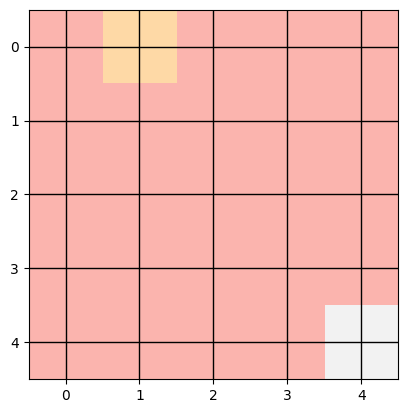

Action: 1, Obs: [0 1], Reward: -1, Accumulated reward: -1


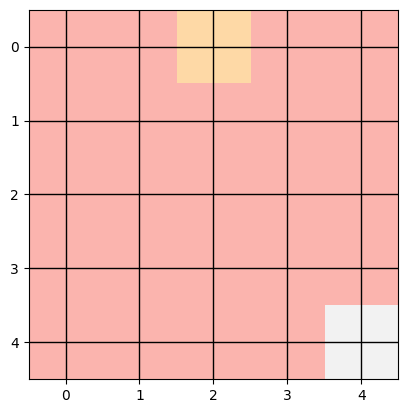

Action: 2, Obs: [0 2], Reward: -1, Accumulated reward: -2


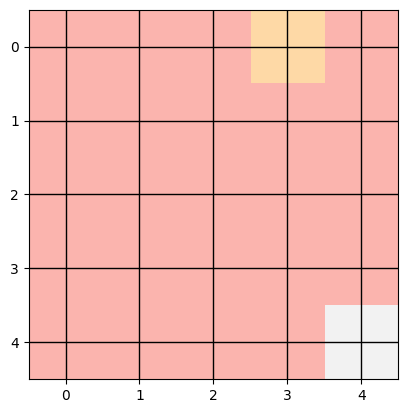

Action: 3, Obs: [0 3], Reward: -1, Accumulated reward: -3


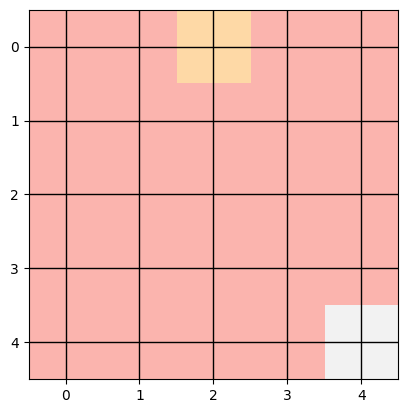

Action: 2, Obs: [0 2], Reward: -1, Accumulated reward: -4


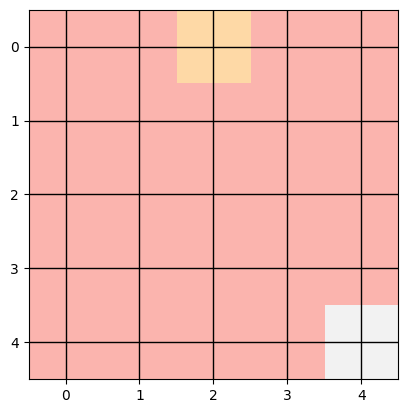

Action: 3, Obs: [0 2], Reward: -1, Accumulated reward: -5


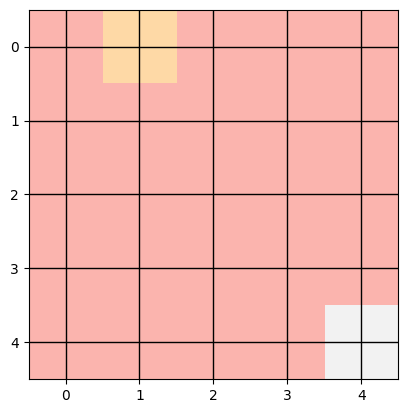

Action: 0, Obs: [0 1], Reward: -1, Accumulated reward: -6


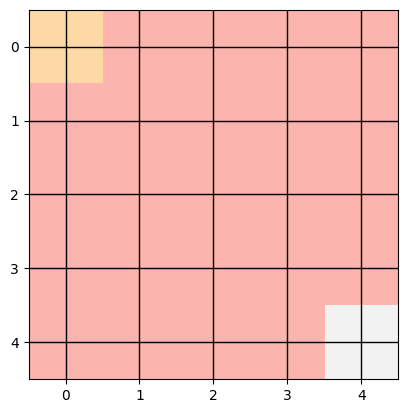

Action: 2, Obs: [0 0], Reward: -1, Accumulated reward: -7


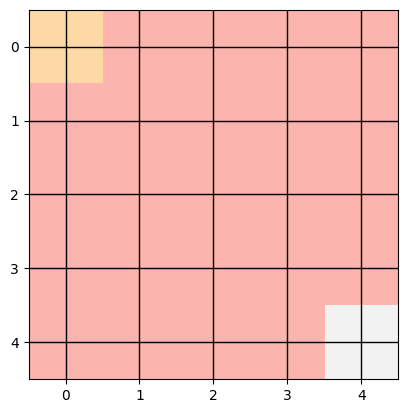

Action: 0, Obs: [0 0], Reward: -1, Accumulated reward: -8


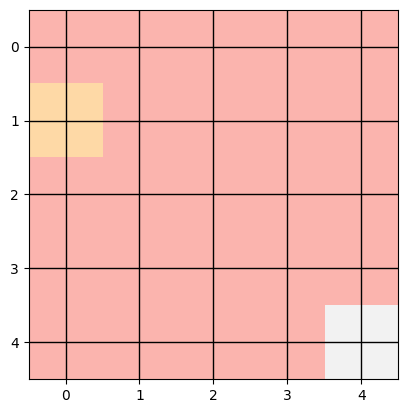

Action: 3, Obs: [1 0], Reward: -1, Accumulated reward: -9


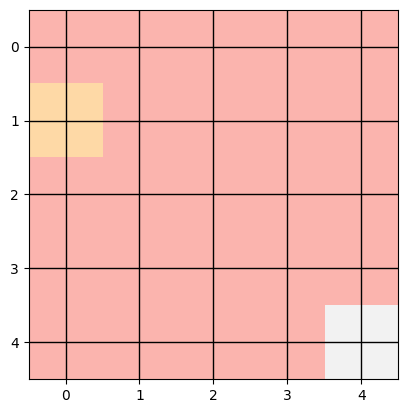

Action: 1, Obs: [1 0], Reward: -1, Accumulated reward: -10


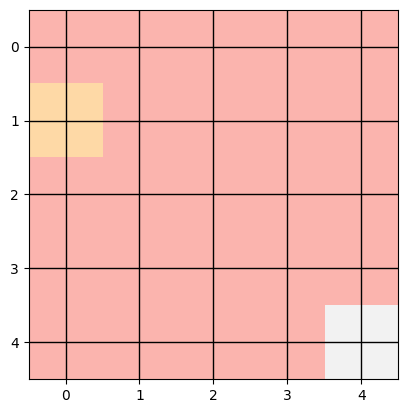

Action: 3, Obs: [1 0], Reward: -1, Accumulated reward: -11


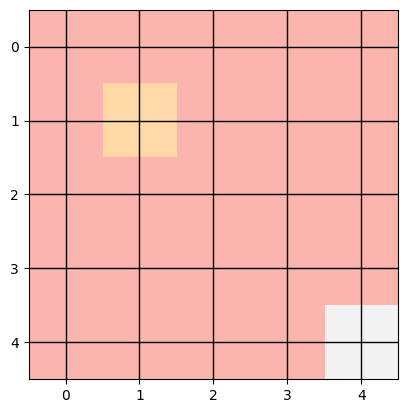

Action: 3, Obs: [1 1], Reward: -1, Accumulated reward: -12


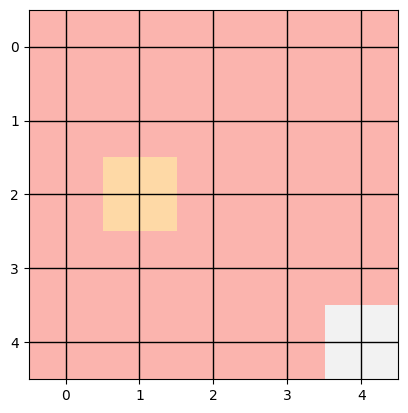

Action: 1, Obs: [2 1], Reward: -1, Accumulated reward: -13


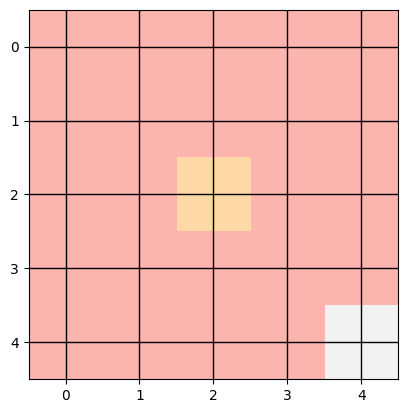

Action: 0, Obs: [2 2], Reward: -1, Accumulated reward: -14


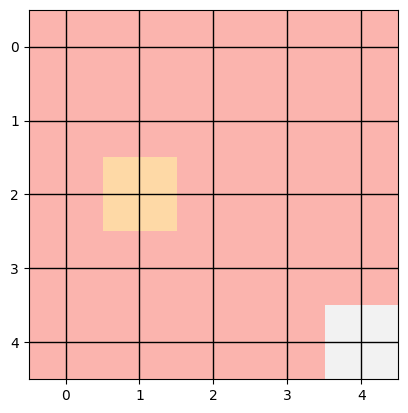

Action: 2, Obs: [2 1], Reward: -1, Accumulated reward: -15


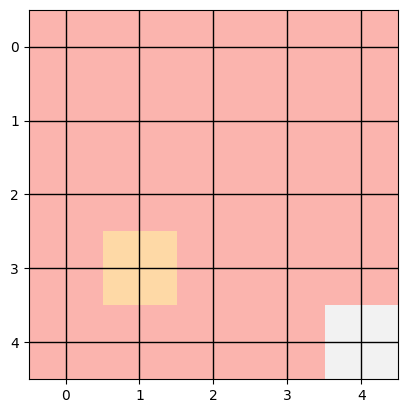

Action: 0, Obs: [3 1], Reward: -1, Accumulated reward: -16


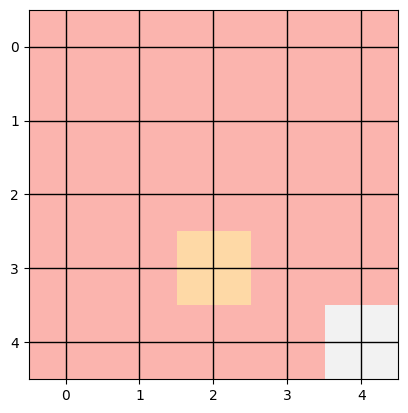

Action: 3, Obs: [3 2], Reward: -1, Accumulated reward: -17


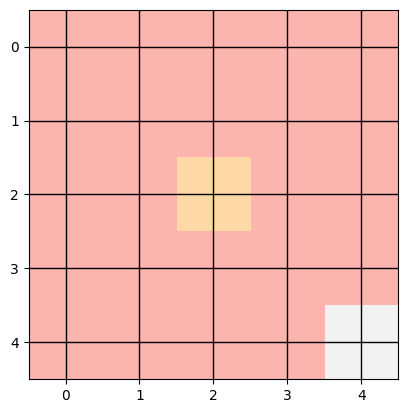

Action: 3, Obs: [2 2], Reward: -1, Accumulated reward: -18


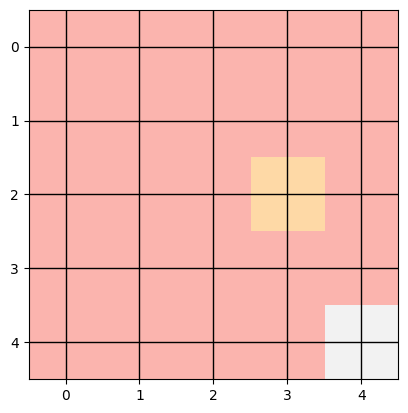

Action: 1, Obs: [2 3], Reward: -1, Accumulated reward: -19


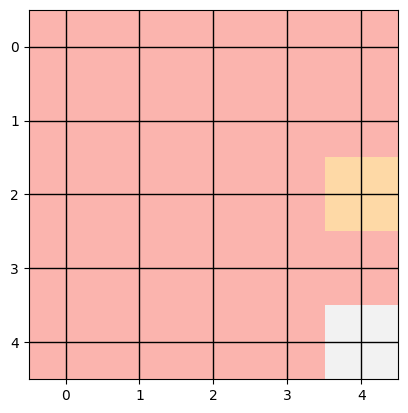

Action: 0, Obs: [2 4], Reward: -1, Accumulated reward: -20
Episode finished! Total accumulated reward: -20


In [28]:
import random

# Create environment
env = create_gridworld()
obs = reset(env)

done = False
total_reward = 0

for _ in range(20):  # Limit to 20 steps
    action = env["action_space"].sample()
    obs, reward, done = step(env, random.randint(0,3))
    total_reward += reward
    render_plot(env)  # Visualize each step
    print(f"Action: {action}, Obs: {obs}, Reward: {reward}, Accumulated reward: {total_reward}")
    if done:
        break
print(f"Episode finished! Total accumulated reward: {total_reward}")
